
# <span style="color:rgb(213,80,0)">Tutorial 1 \- Your First BattMo Model</span>

## Introduction

Let’s make your first **BattMo** model! ?⚡?


In this tutorial, we will build, run, and visualize a simple pseudo\-two\-dimensional (P2D) simulation for a Li\-ion battery cell. We will first introduce how **BattMo** handles model parameters, then run the simulation, dashboard the results, and explore the details of the simulation output.

## Define Parameters

**BattMo** uses JSON to manage parameters. This allows you to easily save, document, and share complete parameter sets from specific simulations. We have used long and explicit key names for good readability. If you are new to JSON, you can learn more about it [here](https://www.w3schools.com/js/js_json_intro.asp). Details on the BattMo specification are available in the [JSON input specification](https://battmoteam.github.io/BattMo/json.html).


For this example, we provide a sample JSON file [sample\_input.json](https://github.com/BattMoTeam/BattMo/blob/main/Examples/JsonDataFiles/sample_input.json) that describes a simple NMC\-Graphite cell.


We load and parse the JSON input file into **BattMo** using the command:


In [1]:
jsonstruct = parseBattmoJson('Examples/JsonDataFiles/sample_input.json');


This transforms the parameter data as a [MATLAB structure](https://se.mathworks.com/help/matlab/structures.html) <samp>jsonstruct</samp> that is used to setup the simulation. We can explore the structure within the MATLAB Command Window by navigating the different levels of the structure.


In [2]:
disp(jsonstruct)

                   use_thermal: 0
    include_current_collectors: 0
                      Geometry: [1x1 struct]
             NegativeElectrode: [1x1 struct]
             PositiveElectrode: [1x1 struct]
                     Separator: [1x1 struct]
                       Control: [1x1 struct]
                   Electrolyte: [1x1 struct]
                  ThermalModel: [1x1 struct]
                  TimeStepping: [1x1 struct]
                        Output: [1x1 struct]
                           SOC: 0.9900
                         initT: 298.1500


We can see that the structure contains various attributes for the different aspects of the model. For example, if we want to know the thickness of the negative electrode coating, we can navigate the hierarchy to find it:


In [3]:
disp(jsonstruct.NegativeElectrode.Coating.thickness)

   6.4000e-05


Unless otherwise specified, BattMo uses [SI base units](https://www.nist.gov/si-redefinition/definitions-si-base-units) for physical quantities.

## Run Simulation

We can run the simulation with the command:


In [4]:
output = runBatteryJson(jsonstruct);

## Show the Dashboard

We can dashboard the main results using [plotDashboard](https://github.com/BattMoTeam/BattMo/blob/main/Utilities/Visualization/plotDashboard.m). Here, for example at time step 10,



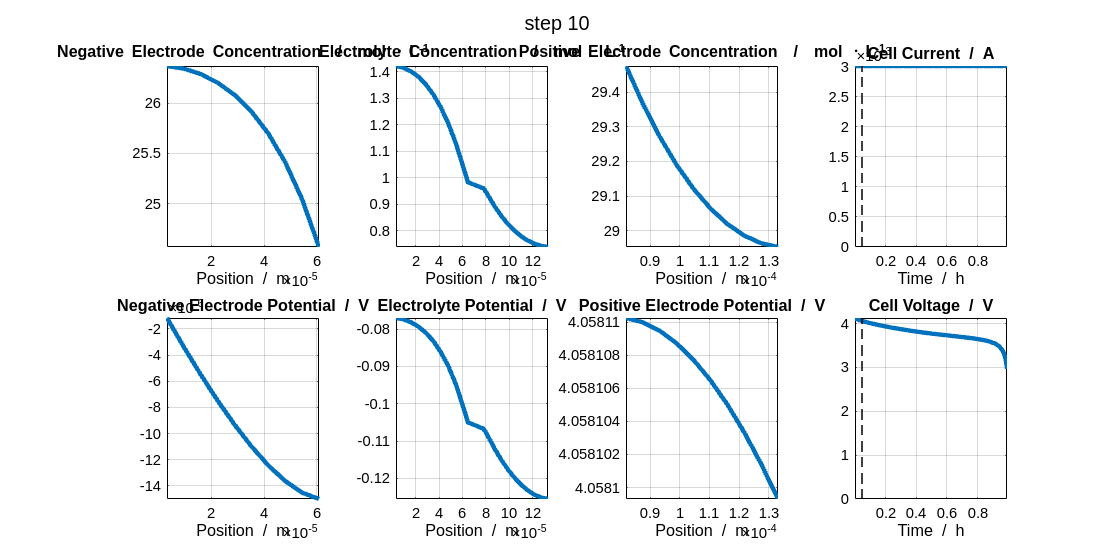

In [5]:
plotDashboard(output.model, output.states, 'step', 10);


The left 3 columns of the dashboard shows the profiles for the main state quantities (concentration and electric potential) in the negative electrode, electrolyte, and positive electrode. The rightmost column shows the calculated cell current and voltage. In the following subsections, we will explore how to access and plot this data from the simulation output.

## Explore the Output

The <samp>output</samp> structure returns among other thing the model and the states.


In [6]:
disp(output)

              model: [1x1 GenericBattery]
        inputparams: [1x1 BatteryInputParams]
           schedule: [1x1 struct]
          initstate: [1x1 struct]
    nonLinearSolver: [1x1 NonLinearSolver]
               time: [116x1 double]
                  E: [116x1 double]
                  I: [116x1 double]
           globvars: {116x1 cell}
             states: {116x1 cell}
             energy: [115x1 double]
      energyDensity: [115x1 double]
     specificEnergy: []


The <samp>model</samp> contains information about the setup of the model and initial conditions, while <samp>states</samp> contains the results of the simulation at each timestep. Plotting the simulation results requires information about the grid (i.e. what is the position where the quantity is calculated?) and the state (i.e. what is the value of the quantity in that position at a given time?).

## Explore the Grid

The grid (or mesh) is one of the most used properties of the model, which can be accessed with the command:


In [7]:
disp(output.model.grid)

      cells: [1x1 struct]
      faces: [1x1 struct]
      nodes: [1x1 struct]
    griddim: 1
       type: 'generic'


We can see that the grid is stored as a structure with information about the cells, faces, nodes, etc. The values of the state quantities (e.g. concentration and electric potential) are calculated at the centroids of the cells. To plot the positions of the centroids, we can use the following commands:



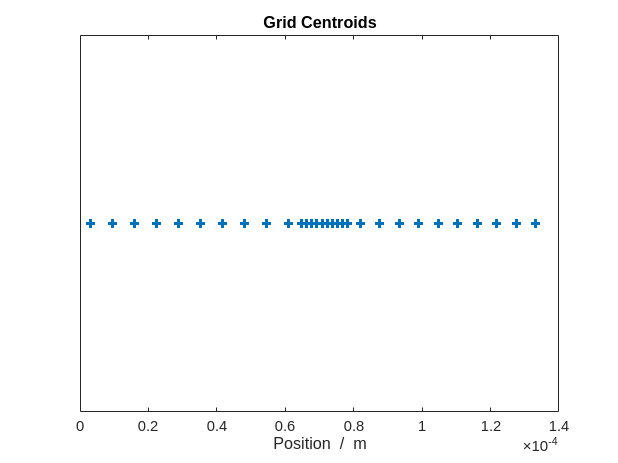

In [8]:
% get the centroid locations for the full grid
x = output.model.grid.cells.centroids;

% plot them in a figure
figure();
grid_axes = axes();
plot(grid_axes, x, zeros(size(x)), '+', 'LineWidth', 2)

% remove the y-axis ticks
yticks([]);

% add plot annotations
title('Grid Centroids');
xlabel('Position  /  m');


This shows the overall grid that is used for the model. However, **BattMo** models use a modular hierarchy where the overall cell model is composed of smaller submodels for electrodes, electrolyte, and current collectors. Each of these submodels has its own grid.


For example, if we want to plot the grid associated with the different submodels in different colors, we can use the following commands:



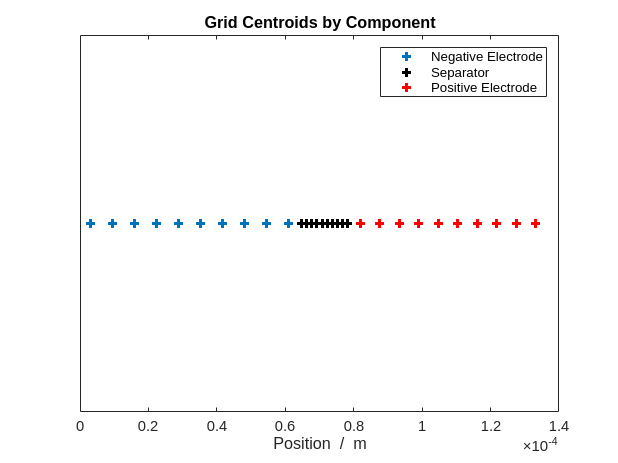

In [9]:
% get the centroid locations for the negative electrode (x_ne), separator
% (x_sep), and positive electrode (x_pe)
x_ne = output.model.NegativeElectrode.grid.cells.centroids;
x_sep = output.model.Separator.grid.cells.centroids;
x_pe = output.model.PositiveElectrode.grid.cells.centroids;

% plot them together on one figure
figure()
plot(x_ne, zeros(size(x_ne)), '+', 'LineWidth', 2)
hold on
plot(x_sep, zeros(size(x_sep)), '+k', 'LineWidth', 2)
plot(x_pe, zeros(size(x_pe)), '+r', 'LineWidth', 2)

% remove the y-axis tick marks
yticks([]);

% add plot annotations
title('Grid Centroids by Component')
xlabel('Position  /  m')
legend('Negative Electrode', 'Separator', 'Positive Electrode')


If you would like more information about the **BattMo** model hierarchy, please see [BattMo model architecture](https://battmoteam.github.io/BattMo/architecture.html)

## Explore the States

The values of the state quantities at each time step are stored in the <samp>states</samp> [cell array](https://se.mathworks.com/help/matlab/cell-arrays.html). Each entry in the array describes the state of the simulation at a given timestep.


For example, we can look at the state of the simulation at timestep 10 (shown in the dashboard plot above) using the command:


In [10]:
timestep = 10;
disp(output.states{timestep})

    NegativeElectrode: [1x1 struct]
    PositiveElectrode: [1x1 struct]
          Electrolyte: [1x1 struct]
              Control: [1x1 struct]
                 time: 168
         ThermalModel: [1x1 struct]


We see that the time of the state is 504 seconds and there are other structures containing the states of the electrodes and electrolyte. We can look into the state of the electrolyte using the command:


In [11]:
disp(output.states{timestep}.Electrolyte)

    phi: [30x1 double]
      c: [30x1 double]


which shows that there are two quantities there for concentration, c, and electric potential, phi.

## Plot a Result

Let’s plot the concentration in the electrolyte at timestep 10. We can plot the results using basic MATLAB commands this way:



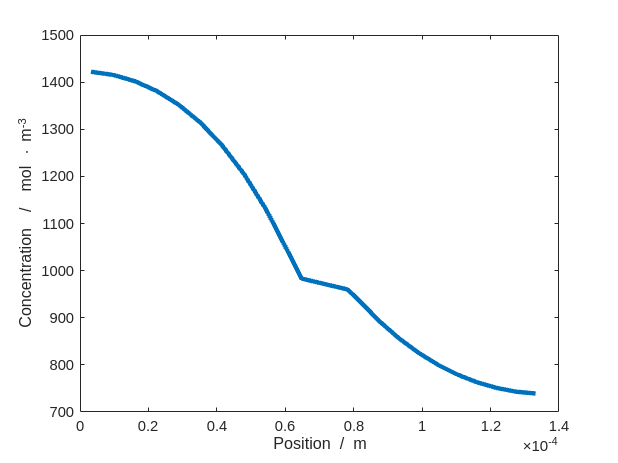

In [12]:
% get the centroid locations and the values for the electrolyte
% concentration at the given timestep
x = output.model.grid.cells.centroids;
c = output.states{timestep}.Electrolyte.c;

% plot the concentration values at the given grid centroid locations
figure()
plot(x, c, 'LineWidth', 3)

% add plot annotations
xlabel('Position  /  m')
ylabel('Concentration  /  mol \cdot m^{-3}')


**BattMo** also includes dedicated plotting functions that will come in handy when we start working with more complex systems (e.g. P4D grids). To demonstrate how it works, we can plot the electrolyte concentration profile at every timestep using the **BattMo** function <samp>plotCellData</samp>:



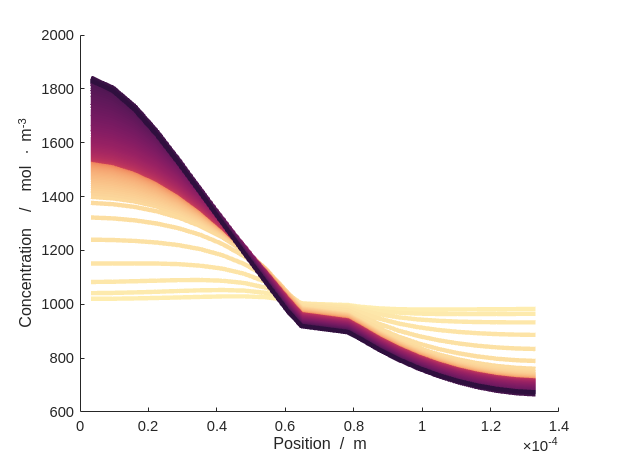

In [13]:
% create a figure and use hold on to show multiple lines in one figure
figure();
hold on

% define a colormap for the line colors
cm = cmocean('matter', length(output.states));

% iterate through each of the output states and plot the calculated
% electrolyte concentration at each timestep
for timestep = 1:length(output.states)
    plotCellData(output.model.grid, output.states{timestep}.Electrolyte.c, 'LineWidth', 3, 'Color', cm(timestep,:))
end

% add plot annotations and turn hold off
xlabel('Position  /  m')
ylabel('Concentration  /  mol \cdot m^{-3}')
hold off


You did it! ? You have run an post\-processed your first BattMo simulation! But there are still a lot of exciting features to discover. Let’s keep going and explore making chages to the model. ?

